# Understanding Data

In [1]:
# Importing necessary dependecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Ignores future and user warnings
import warnings

warningss = [UserWarning, FutureWarning]
def ignore_warnings(warningss):
  for warning in warningss:
    warnings.filterwarnings("ignore", category=warning)


In [5]:
# Reading Data from a csv and creating a dataframe
data = pd.read_csv(r"/content/survey_results_public.csv")
df = pd.DataFrame(data)

In [6]:
# Looking at a few instances of the data
df.head(20)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,...,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,...,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60892 entries, 0 to 60891
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           60892 non-null  int64  
 1   Q120                                 60892 non-null  object 
 2   MainBranch                           60892 non-null  object 
 3   Age                                  60892 non-null  object 
 4   Employment                           60131 non-null  object 
 5   RemoteWork                           51961 non-null  object 
 6   CodingActivities                     51927 non-null  object 
 7   EdLevel                              60179 non-null  object 
 8   LearnCode                            59969 non-null  object 
 9   LearnCodeOnline                      47907 non-null  object 
 10  LearnCodeCoursesCert                 25216 non-null  object 
 11  YearsCode                   

In [8]:
# Get stats for numerical attributes
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,60892.000000,3.484600e+04,31794.000000,3.470400e+04
mean,30446.500000,1.434885e+42,11.612160,1.030894e+05
std,17578.150633,2.678512e+44,8.927205,5.632517e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,15223.750000,6.500000e+04,5.000000,4.620100e+04
50%,30446.500000,1.160000e+05,10.000000,7.709750e+04
75%,45669.250000,2.300000e+05,16.000000,1.250000e+05
max,60892.000000,5.000000e+46,50.000000,7.435143e+07


In [9]:
# Looking for correlations
df[["CompTotal", "WorkExp", "ConvertedCompYearly"]].corr()

,CompTotal,WorkExp,ConvertedCompYearly
CompTotal,1.000000,-0.000508,0.101614
WorkExp,-0.000508,1.000000,0.042361
ConvertedCompYearly,0.101614,0.042361,1.000000


array([[<Axes: xlabel='ResponseId', ylabel='ResponseId'>,
        <Axes: xlabel='CompTotal', ylabel='ResponseId'>,
        <Axes: xlabel='WorkExp', ylabel='ResponseId'>,
        <Axes: xlabel='ConvertedCompYearly', ylabel='ResponseId'>],
       [<Axes: xlabel='ResponseId', ylabel='CompTotal'>,
        <Axes: xlabel='CompTotal', ylabel='CompTotal'>,
        <Axes: xlabel='WorkExp', ylabel='CompTotal'>,
        <Axes: xlabel='ConvertedCompYearly', ylabel='CompTotal'>],
       [<Axes: xlabel='ResponseId', ylabel='WorkExp'>,
        <Axes: xlabel='CompTotal', ylabel='WorkExp'>,
        <Axes: xlabel='WorkExp', ylabel='WorkExp'>,
        <Axes: xlabel='ConvertedCompYearly', ylabel='WorkExp'>],
       [<Axes: xlabel='ResponseId', ylabel='ConvertedCompYearly'>,
        <Axes: xlabel='CompTotal', ylabel='ConvertedCompYearly'>,
        <Axes: xlabel='WorkExp', ylabel='ConvertedCompYearly'>,
        <Axes: xlabel='ConvertedCompYearly', ylabel='ConvertedCompYearly'>]],
      dtype=object)

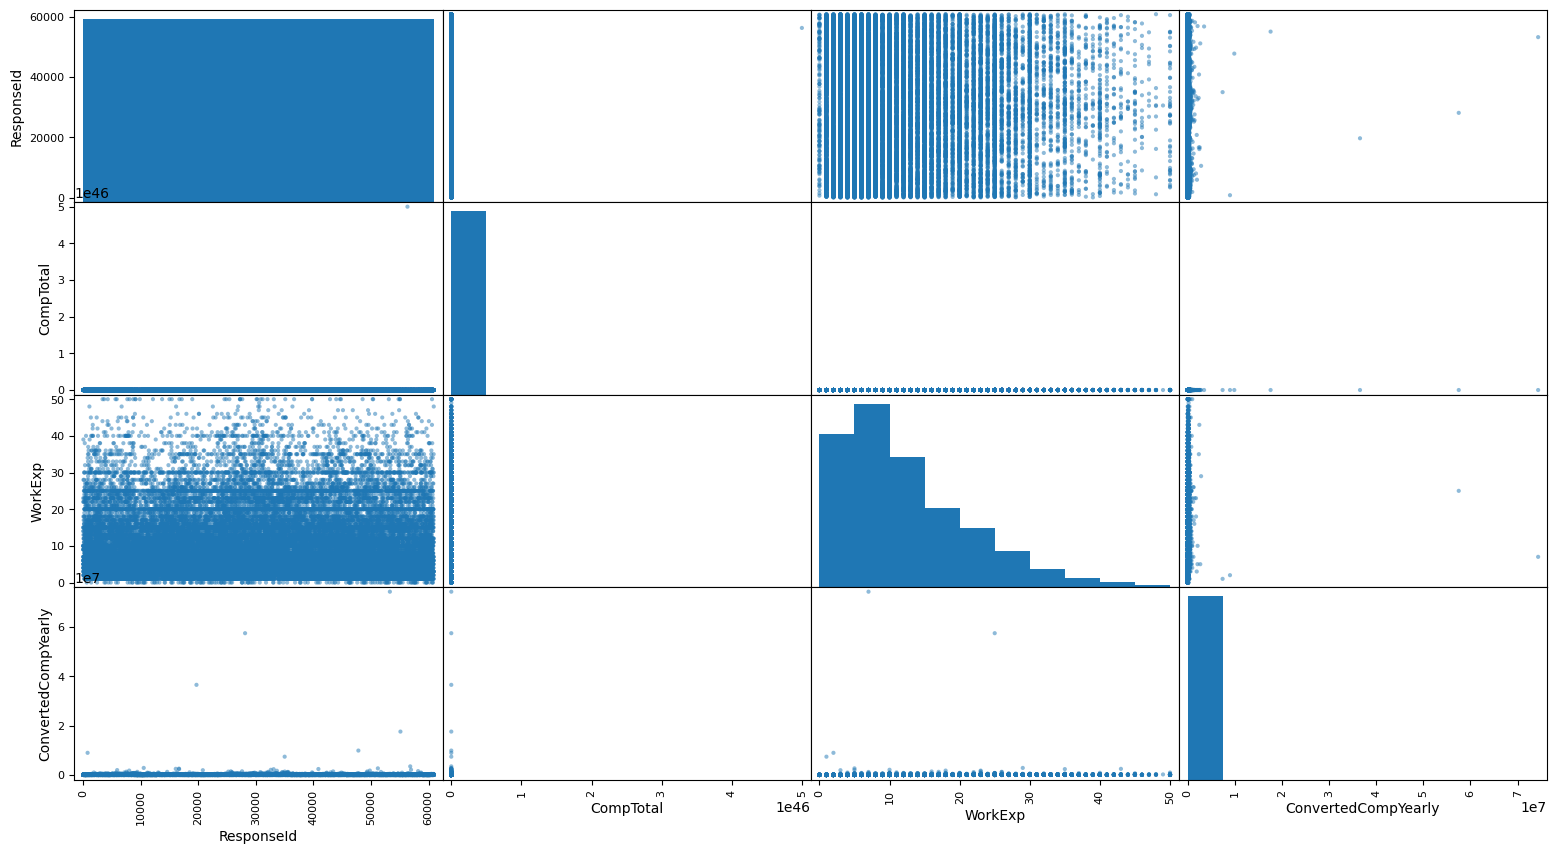

In [11]:
# Creating a scatterplot to show the correlation between different numerical attributes
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(19,10), grid=True, diagonal="hist",)

# Data Preprocessing

In [12]:
# Dropping unecessary columns
df.drop(["ResponseId", "Q120", "MainBranch", "LearnCode", "LearnCodeOnline",
                "LearnCodeCoursesCert", "PurchaseInfluence", "TechList",
                "BuyNewTool", "LanguageWantToWorkWith", "DatabaseWantToWorkWith", "PlatformWantToWorkWith",
                "WebframeWantToWorkWith", "MiscTechWantToWorkWith", "ToolsTechWantToWorkWith", "NEWCollabToolsHaveWorkedWith",
                "NEWCollabToolsWantToWorkWith", "OpSysPersonal use", "OpSysProfessional use", "OfficeStackAsyncHaveWorkedWith",
                "OfficeStackAsyncWantToWorkWith", "OfficeStackSyncHaveWorkedWith", "OfficeStackSyncWantToWorkWith", "AISearchHaveWorkedWith",
                "AISearchWantToWorkWith", "AIDevHaveWorkedWith", "AIDevWantToWorkWith", "NEWSOSites", "SOVisitFreq", "SOAccount", "SOPartFreq",
                "SOComm", "SOAI", "AISelect", "AISent", "AIAcc", "AIBen", "AIToolInterested in Using", "AIToolCurrently Using", "AIToolNot interested in Using",
                "AINextVery different", "AINextNeither different nor similar", "AINextSomewhat similar", "AINextVery similar", "AINextSomewhat different", "TBranch",
                "ICorPM", "Knowledge_1", "Knowledge_2", "Knowledge_3", "Knowledge_4", "Knowledge_5", "Knowledge_6", "Knowledge_7", "Knowledge_8",
                "Frequency_1", "Frequency_2", "Frequency_3", "TimeSearching", "TimeAnswering", "SurveyLength", "SurveyEase", "Currency", "CompTotal","CodingActivities"], inplace=True, axis=1)

In [13]:
# Dropping missing values
df.dropna(inplace=True)

In [14]:
df.head()

,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,WorkExp,ProfessionalTech,Industry,ConvertedCompYearly
1,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,HTML/CSS;JavaScript;Python,Supabase,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,Electron;React Native;Tauri,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,10.0,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0
6,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,4,3,"Developer, full-stack","1,000 to 4,999 employees",United States of America,Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript...,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Amazon Web Services (AWS);Digital Ocean,AngularJS;jQuery;Node.js;Phoenix;Ruby on Rails...,RabbitMQ;Spring Framework,Bun;Cargo;Chocolatey;Docker;Homebrew;Kubernete...,4.0,Microservices;Automated testing;Continuous int...,"Information Services, IT, Software Development...",135000.0
7,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,3,"Developer, full-stack",10 to 19 employees,United States of America,Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript,Dynamodb;MongoDB;MySQL;Redis;SQLite,Amazon Web Services (AWS);Fly.io;Netlify;Vercel,Angular;Express;Next.js;Node.js;React,NumPy;Pandas;Scikit-Learn;Tauri;TensorFlow,Ansible;Cargo;Docker;Homebrew;Make;npm;Pip;pnp...,5.0,None of these,Financial Services,80000.0
15,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15,10,"Developer, back-end",100 to 499 employees,Germany,Bash/Shell (all shells);Dart;Go;Haskell;HTML/C...,Cassandra;Dynamodb;Elasticsearch;H2;MariaDB;Mo...,Amazon Web Services (AWS);Microsoft Azure,Angular;Express;Spring Boot,Apache Kafka;Flutter;RabbitMQ;Spring Framework,Ansible;Ant;Docker;Gradle;Kubernetes;Make;Mave...,15.0,Microservices;Automated testing;Observability ...,"Manufacturing, Transportation, or Supply Chain",107090.0
19,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Some college/university study without earning ...,24,14,"Developer, full-stack",20 to 99 employees,Germany,Java;JavaScript;TypeScript,MariaDB;PostgreSQL,Amazon Web Services (AWS);Digital Ocean;Hetzne...,Angular;Express;Node.js,Spring Framework,Docker;Gradle;npm;Podman;Terraform;Vite,14.0,Observability tools;Continuous integration (CI...,"Information Services, IT, Software Development...",75010.0


In [15]:
# Converting necessary columns into numerical
df["YearsCode"] = pd.to_numeric(df["YearsCode"].replace("Less than 1 year", 0).replace("More than 50 years", 50))
df["YearsCodePro"] = pd.to_numeric(df["YearsCode"].replace("Less than 1 year", 0).replace("More than 50 years", 50))
df["WorkExp"] = pd.to_numeric(df["WorkExp"])

In [16]:
# Converting necessary columns into categorical
def turn_to_cat(cols:list):
    for col in cols:
        df[col] = df[col].astype("category")

turn_to_cat(["Age", "Employment", "RemoteWork", "EdLevel", "DevType", "OrgSize", "Country", "Industry"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9281 entries, 1 to 60876
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      9281 non-null   category
 1   Employment               9281 non-null   category
 2   RemoteWork               9281 non-null   category
 3   EdLevel                  9281 non-null   category
 4   YearsCode                9281 non-null   int64   
 5   YearsCodePro             9281 non-null   int64   
 6   DevType                  9281 non-null   category
 7   OrgSize                  9281 non-null   category
 8   Country                  9281 non-null   category
 9   LanguageHaveWorkedWith   9281 non-null   object  
 10  DatabaseHaveWorkedWith   9281 non-null   object  
 11  PlatformHaveWorkedWith   9281 non-null   object  
 12  WebframeHaveWorkedWith   9281 non-null   object  
 13  MiscTechHaveWorkedWith   9281 non-null   object  
 14  ToolsTechHav

In [18]:
# Capping outliers
def cap_outliers(df, column_name, lower_percentile, upper_percentile):
  lower_bound = df[column_name].quantile(lower_percentile/100)
  upper_bound = df[column_name].quantile(upper_percentile/100)

  df[column_name] = np.where(df[column_name] < lower_bound, lower_bound, df[column_name])
  df[column_name] = np.where(df[column_name] > upper_bound, upper_bound, df[column_name])
  return df

df = cap_outliers(df, "ConvertedCompYearly", lower_percentile=25, upper_percentile=100)

# Feature Engineering

In [24]:
# Feature engineering
df["NumberOfLanguages"] = df["LanguageHaveWorkedWith"].str.split(";").apply(len)
df["NumberOfPlatforms"] = df["PlatformHaveWorkedWith"].str.split(";").apply(len)
df["NumberOfWebframe"] = df["WebframeHaveWorkedWith"].str.split(";").apply(len)
df["NumberOfMiscTech"] = df["MiscTechHaveWorkedWith"].str.split(";").apply(len)
df["NumberOfToolsTech"] = df["ToolsTechHaveWorkedWith"].str.split(";").apply(len)
df["NumberOfDatabases"] = df["DatabaseHaveWorkedWith"].str.split(";").apply(len)

In [25]:
# Dropping columns
df.drop(["LanguageHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith",
         "MiscTechHaveWorkedWith", "ToolsTechHaveWorkedWith", "DatabaseHaveWorkedWith"], axis=1, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9281 entries, 1 to 60876
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  9281 non-null   category
 1   Employment           9281 non-null   category
 2   RemoteWork           9281 non-null   category
 3   EdLevel              9281 non-null   category
 4   YearsCode            9281 non-null   int64   
 5   YearsCodePro         9281 non-null   int64   
 6   DevType              9281 non-null   category
 7   OrgSize              9281 non-null   category
 8   Country              9281 non-null   category
 9   WorkExp              9281 non-null   float64 
 10  ProfessionalTech     9281 non-null   object  
 11  Industry             9281 non-null   category
 12  ConvertedCompYearly  9281 non-null   float64 
 13  NumberOfLanguages    9281 non-null   int64   
 14  NumberOfPlatforms    9281 non-null   int64   
 15  NumberOfWebframe     9281

In [27]:
# Binning the target value
df["ConvertedCompYearly_binned"] = pd.qcut(df["ConvertedCompYearly"], q=10, duplicates="drop")

In [28]:
# Applying different encoding techniques on various columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

# Defining which columns are which
numerical_columns = ["YearsCode", "YearsCodePro", "WorkExp", "NumberOfLanguages", "NumberOfPlatforms",
                     "NumberOfWebframe", "NumberOfMiscTech", "NumberOfToolsTech", "NumberOfDatabases"]
ordinal_cols = ["Age", "EdLevel", "OrgSize"]
one_hot_cols = ["Employment", "RemoteWork", "DevType", "Country", "ProfessionalTech", "Industry"]

# Encoding relevant columns
preprocessing = ColumnTransformer([
    ("num", "passthrough", ["YearsCode", "YearsCodePro", "WorkExp","NumberOfLanguages", "NumberOfPlatforms",
                     "NumberOfWebframe", "NumberOfMiscTech", "NumberOfToolsTech", "NumberOfDatabases"]),

    ("ord_cols_age", OrdinalEncoder(categories=[["Under 18 years old","18-24 years old","25-34 years old","35-44 years old",
                                                "45-54 years old","55-64 years old","65 years or older","Prefer not to say"]]), ["Age"]),

    ("ord_cols_edlvl", OrdinalEncoder(categories=[["Primary/elementary school","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",
                                                  "Some college/university study without earning a degree","Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",
                                                  "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Something else"]]), ["EdLevel"]),

    ("ord_cols_orgsize", OrdinalEncoder(categories=[["Just me - I am a freelancer, sole proprietor, etc.","2 to 9 employees","10 to 19 employees","20 to 99 employees","100 to 499 employees",
                                                    "500 to 999 employees","1,000 to 4,999 employees","5,000 to 9,999 employees","10,000 or more employees","I don’t know"]]), ["OrgSize"]),

    ("one_hot_cols", OneHotEncoder(handle_unknown="ignore", sparse_output=False), ["Employment", "RemoteWork", "DevType", "Country", "ProfessionalTech", "Industry"])
], remainder="passthrough")

# Creating features and labels
X = df.drop(columns=["ConvertedCompYearly", "ConvertedCompYearly_binned"])
y = np.log1p(df["ConvertedCompYearly"]) # Ensuring that the target value distribution is not skewed

# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df["ConvertedCompYearly_binned"],test_size=0.2, random_state=42)

# Dropping the stratified column
df.drop(columns=["ConvertedCompYearly_binned"], inplace=True)

# Creating a pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ("preprocessor", preprocessing),
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

# Analyzing With Models

In [29]:
# Fitting the pipeline to the linear regression model (Training)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', 'passthrough',
                                                  ['YearsCode', 'YearsCodePro',
                                                   'WorkExp',
                                                   'NumberOfLanguages',
                                                   'NumberOfPlatforms',
                                                   'NumberOfWebframe',
                                                   'NumberOfMiscTech',
                                                   'NumberOfToolsTech',
                                                   'NumberOfDatabases']),
                                                 ('ord_cols_age',
                                                  OrdinalEncoder(categories=[['Under '
                                                                              '18 '
                                                                              'years '
                                                                              'old',
                                                                              '18-24 '
                                                                              'years '
                                                                              '...
                                                                              'employees',
                                                                              '1,000 '
                                                                              'to '
                                                                              '4,999 '
                                                                              'employees',
                                                                              '5,000 '
                                                                              'to '
                                                                              '9,999 '
                                                                              'employees',
                                                                              '10,000 '
                                                                              'or '
                                                                              'more '
                                                                              'employees',
                                                                              'I '
                                                                              'don’t '
                                                                              'know']]),
                                                  ['OrgSize']),
                                                 ('one_hot_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Employment', 'RemoteWork',
                                                   'DevType', 'Country',
                                                   'ProfessionalTech',
                                                   'Industry'])])),
                ('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

In [30]:
# Using the model to predict
y_predictions = pipeline.predict(X_test)

In [31]:
# Evaluating the model
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

rmse = root_mean_squared_error(y_test, y_predictions)
mae = mean_absolute_error(y_test, y_predictions)
print(f"RMSE: {rmse:,.4f}")
print(f"MAE: {mae:,.4f}")

RMSE: 0.3372
MAE: 0.2449


In [32]:
# Overfitting check
y_train_pred = pipeline.predict(X_train)
y_train_rmse = root_mean_squared_error(y_train, y_train_pred)

y_test_pred = pipeline.predict(X_test)
y_test_rmse = root_mean_squared_error(y_test, y_test_pred)

print(f"Train RMSE: {y_train_rmse:,.4f}")
print(f"Test RMSE: {y_test_rmse:,.4f}")
print(f"Train MAE: {mean_absolute_error(y_train, pipeline.predict(X_train)):,.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, pipeline.predict(X_test)):,.4f}")

Train RMSE: 0.3130
Test RMSE: 0.3372
Train MAE: 0.2269
Test MAE: 0.2449


* <font size="2"> The Linear model is slightly overfitting <font>

Trying different models

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Training the models and finding their errors
models = {
    "lin_reg": LinearRegression(),
    "decision_tree": DecisionTreeRegressor(random_state=42),
    "random_forest": RandomForestRegressor(n_estimators=10, random_state=42),
    "xgboost":xgb.XGBRegressor(n_estimators=10, random_state=42, learning_rate=0.3),
    "lgb_reg": lgb.LGBMRegressor(n_estimators=10, random_state=42, learning_rate=0.3, verbose=-1),
    "catboost": CatBoostRegressor(iterations=10, learning_rate=0.3, depth=6, random_state=42),
    "ridge": Ridge(alpha=1.0, random_state=42, max_iter=1000),
    "lasso": Lasso(alpha=0.1, random_state=42, max_iter=1000),
    "elastic_net": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=1000),
}

for name, model in models.items():
    pipeline = Pipeline([
    ("preprocessor", preprocessing),
    ("scaler", StandardScaler()),
    (f"{name}", model)
])
    pipeline.fit(X_train, y_train) # Training the model
    print(f"\n{name} Train RMSE: {root_mean_squared_error(y_train, pipeline.predict(X_train)):,.4f}")
    print(f"{name} Test RMSE: {root_mean_squared_error(y_test, pipeline.predict(X_test)):,.4f}")
    print(f"{name} Train MAE: {mean_absolute_error(y_train, pipeline.predict(X_train)):,.4f}")
    print(f"{name} Test MAE: {mean_absolute_error(y_test, pipeline.predict(X_test)):,.4f}")


lin_reg Train RMSE: 0.3130
lin_reg Test RMSE: 0.3372
lin_reg Train MAE: 0.2269
lin_reg Test MAE: 0.2449

decision_tree Train RMSE: 0.0000
decision_tree Test RMSE: 0.4574
decision_tree Train MAE: 0.0000
decision_tree Test MAE: 0.3141

random_forest Train RMSE: 0.1464
random_forest Test RMSE: 0.3497
random_forest Train MAE: 0.0944
random_forest Test MAE: 0.2422

xgboost Train RMSE: 0.3064
xgboost Test RMSE: 0.3482
xgboost Train MAE: 0.2321
xgboost Test MAE: 0.2556


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



lgb_reg Train RMSE: 0.3097
lgb_reg Test RMSE: 0.3396
lgb_reg Train MAE: 0.2273
lgb_reg Test MAE: 0.2459
0:	learn: 0.4712224	total: 49.8ms	remaining: 448ms
1:	learn: 0.4287658	total: 52.9ms	remaining: 212ms
2:	learn: 0.4054874	total: 56.1ms	remaining: 131ms
3:	learn: 0.3889710	total: 59.2ms	remaining: 88.7ms
4:	learn: 0.3780899	total: 63.1ms	remaining: 63.1ms
5:	learn: 0.3703075	total: 66.2ms	remaining: 44.1ms
6:	learn: 0.3630562	total: 69.3ms	remaining: 29.7ms
7:	learn: 0.3586387	total: 72.3ms	remaining: 18.1ms
8:	learn: 0.3544838	total: 75.5ms	remaining: 8.39ms
9:	learn: 0.3513268	total: 79.4ms	remaining: 0us

catboost Train RMSE: 0.3513
catboost Test RMSE: 0.3684
catboost Train MAE: 0.2689
catboost Test MAE: 0.2768

ridge Train RMSE: 0.3130
ridge Test RMSE: 0.3372
ridge Train MAE: 0.2269
ridge Test MAE: 0.2449

lasso Train RMSE: 0.4209
lasso Test RMSE: 0.4319
lasso Train MAE: 0.3428
lasso Test MAE: 0.3468

elastic_net Train RMSE: 0.3989
elastic_net Test RMSE: 0.4092
elastic_net Trai

In [34]:
# cross validating the  models
from sklearn.model_selection import cross_val_score
for name, model in models.items():
    pipeline = Pipeline([
    ("preprocessor", preprocessing),
    ("scaler", StandardScaler()),
    (f"{name}", model)
])

    cross_val_scores = cross_val_score(pipeline, X, y, scoring="neg_mean_absolute_error", cv=5)
    print(f"\n{name} CV Scores: {-cross_val_scores}")
    print(f"{name} Average CV score: {-cross_val_scores.mean():,.4f}")


lin_reg CV Scores: [0.24529593 0.23769971 0.25389473 0.23380428 0.24380536]
lin_reg Average CV score: 0.2429

decision_tree CV Scores: [0.30992261 0.31030459 0.34753002 0.30130237 0.30992811]
decision_tree Average CV score: 0.3158

random_forest CV Scores: [0.24545599 0.23896841 0.26243779 0.23107642 0.23939   ]
random_forest Average CV score: 0.2435

xgboost CV Scores: [0.26188516 0.25337096 0.26735167 0.24592706 0.25321512]
xgboost Average CV score: 0.2563


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



lgb_reg CV Scores: [0.24768222 0.23386615 0.25652615 0.23502255 0.23745364]
lgb_reg Average CV score: 0.2421
0:	learn: 0.4719218	total: 3.93ms	remaining: 35.4ms
1:	learn: 0.4305241	total: 7.49ms	remaining: 30ms
2:	learn: 0.4054286	total: 10.7ms	remaining: 24.9ms
3:	learn: 0.3893246	total: 13.8ms	remaining: 20.6ms
4:	learn: 0.3756303	total: 16.8ms	remaining: 16.8ms
5:	learn: 0.3691020	total: 19.9ms	remaining: 13.3ms
6:	learn: 0.3633389	total: 22.8ms	remaining: 9.76ms
7:	learn: 0.3587269	total: 25.7ms	remaining: 6.44ms
8:	learn: 0.3535818	total: 28.8ms	remaining: 3.19ms
9:	learn: 0.3495043	total: 31.8ms	remaining: 0us
0:	learn: 0.4851362	total: 3.38ms	remaining: 30.5ms
1:	learn: 0.4401732	total: 7.16ms	remaining: 28.7ms
2:	learn: 0.4121282	total: 10.3ms	remaining: 24.1ms
3:	learn: 0.3946562	total: 13.4ms	remaining: 20.1ms
4:	learn: 0.3805516	total: 16.5ms	remaining: 16.5ms
5:	learn: 0.3716944	total: 19.6ms	remaining: 13ms
6:	learn: 0.3648835	total: 22.5ms	remaining: 9.65ms
7:	learn: 0.3

Tuning and Testing

 * <font size="2"> The LightGBM Regressor was the most promising model, so we will tune it instead. <font>

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pipeline = Pipeline([
    ("preprocessor", preprocessing),
    ("lgb_reg", lgb.LGBMRegressor(n_estimators=10, random_state=42, learning_rate=0.3, verbose=-1))
])

param_grid = {
   'lgb_reg__learning_rate': [0.01, 0.05, 0.1],
    'lgb_reg__n_estimators': [100, 500, 1000],
    'lgb_reg__num_leaves': [31, 63, 127],
    'lgb_reg__max_depth': [-1, 5, 10],
    'lgb_reg__subsample': [0.7, 0.9, 1.0],
    'lgb_reg__colsample_bytree': [0.7, 0.9, 1.0],
    'lgb_reg__reg_alpha': [0.0, 0.1, 0.5],
    'lgb_reg__reg_lambda': [0.0, 0.1, 0.5],
    'lgb_reg__min_child_samples': [20, 50, 100]
}


grid_search = RandomizedSearchCV(pipeline, param_distributions=param_grid,
n_iter=100, cv=10, verbose=2, random_state=42, n_jobs=-1)

# Fitting the model
grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
# Using our best model to make predictions
print("Train MAE: ", mean_absolute_error(y_train, best_model.predict(X_train)))
print("Test MAE: ", mean_absolute_error(y_test, best_model.predict(X_test)))

In [ ]:
# Cross validating our best model
cross_val_scores = cross_val_score(best_model, X, y, scoring="neg_mean_absolute_error", cv=10)
print(f"CV Scores: {-cross_val_scores}")
print(f"Average CV score: {-cross_val_scores.mean():,.4f}")

<font size="2">After tuning, the model seems to have slightly improved <font>

# Visualizing Results

In [ ]:
# Plotting actual vs predictions for our best model
plt.figure(figsize=(19,10))
plt.scatter(y_test, best_model.predict(X_test))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Tuned Model)")
plt.figure(figsize=(19,10))
plt.savefig("actual_vs_predicted (Tuned Model).png")
plt.show()


In [ ]:
# Plotting actual vs predictions for our base model
pipeline.fit(X_train, y_train)
plt.figure(figsize=(19,10))
plt.scatter(y_test, pipeline.predict(X_test))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Base Model)")
plt.savefig("actual_vs_predicted (Base Model).png")
plt.show()


<font size="2"> The model seems to be doing okay for higher salaries but noisy in the mid-range and overpredicts on low salaries <font>

In [ ]:
# Plotting a residuals plot
import seaborn as sns
plt.figure(figsize=(19,10))
sns.scatterplot(x=best_model.predict(X_test), y=y_test-best_model.predict(X_test))
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residuals Plot")
plt.savefig("residuals_plot.png")
plt.show()

In [ ]:
# Plotting a residuals distribution
plt.figure(figsize=(19,10))
sns.histplot(y_test-best_model.predict(X_test), kde=True, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.grid(True)
plt.savefig("residuals_distribution.png")
plt.show()

In [ ]:
# Saving the model
import joblib
joblib.dump(best_model, "best_model.pkl")